In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import utils
import json
import pandas as pd
import numpy as np

In [3]:
apdist_table = pd.read_csv('synth_table_12_11_24_post_apdist.csv')
rmse_table = pd.read_csv('synth_table_12_11_24_post_rmse.csv')

In [4]:
with open('scaled_intensities_120nmRound2.json', 'r') as f:
    intensities = json.load(f)

with open('constants_2024_12_11.json', 'r') as f:
    constants = json.load(f)

## TEOS-water phase map

In [5]:
bounds = np.array([[0,0], [1,1]])

In [6]:
constants

{'TEOS': {'minimum_volume_fraction': 0.01,
  'maximum_volume_fraction': 0.15,
  'density': 0.933,
  'stock_concentration': 4.48,
  'molecular_weight': 208.33,
  'stock_source': 'Benson Jug',
  'manufacturer': 'Aldrich',
  'lot_number': 'WXBC2231V'},
 'water': {'minimum_volume_fraction': 0.005,
  'maximum_volume_fraction': 0.15,
  'density': 0.9982,
  'stock_concentration': 55.51,
  'molecular_weight': 18.015,
  'stock_source': 'Benson DI machine',
  'manufacturer': 'nan',
  'lot_number': 'nan'},
 'ammonia': {'minimum_volume_fraction': 0.005,
  'maximum_volume_fraction': 0.11,
  'density': 0.9,
  'molecular_weight': 35.046,
  'stock_concentration': 55.51,
  'stock_source': 'Benson vial',
  'manufacturer': 'Fisher scientific',
  'lot_number': '146981'},
 'ethanol': {'minimum_volume_fraction': 0.1,
  'maximum_volume_fraction': 0.1,
  'density': 0.789,
  'molecular_weight': 46.07,
  'stock_concentration': 55.51,
  'stock_source': 'Benson aliquot from MolES',
  'manufacturer': 'Decon_labs',

In [7]:
x_name = 'TEOS'
y_name = 'water'
y_2_name = 'ammonia'

x_min = constants[x_name]['minimum_volume_fraction']
x_max = constants[x_name]['maximum_volume_fraction']
y_min = constants[y_name]['minimum_volume_fraction']
y_max = constants[y_name]['maximum_volume_fraction']

y_2_min = constants[y_2_name]['minimum_volume_fraction']
y_2_max = constants[y_2_name]['maximum_volume_fraction']

bounds = np.array([[x_min, y_min], [x_max, y_max]])
bounds_2 = np.array([[x_min, y_2_min], [x_max, y_2_max]])

I scaled None
I scaled None
I scaled None
I scaled None
I scaled None
I scaled None
I scaled None
I scaled None
I scaled None
I scaled None
I scaled None
I scaled None


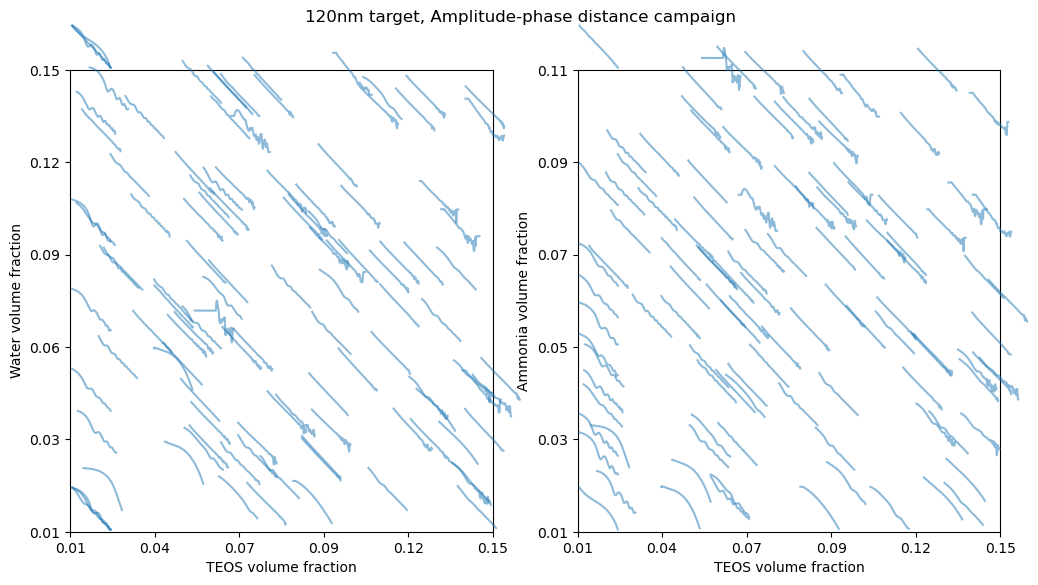

In [12]:
x_key = 'teos_vol_frac'
y_key = 'water_vol_frac'
y_2_key = 'ammonia_vol_frac'

fig, ax = plt.subplots(1,2, figsize = (12,6))

c_1 = []
s = []
c_2 = []
for i, row in apdist_table.iterrows():
    uuid_val = row['uuid']

    x_val = row[x_key]
    y_val = row[y_key]
    y_2_val = row[y_2_key]
    
    intensity = intensities[uuid_val]
    

    q = intensity['q_grid']
    I = intensity['I_scaled']

    if I == None:
        print('I scaled None')
        continue

    else:
        c_1.append([x_val, y_val])
        s.append(I)
        c_2.append([x_val, y_2_val])

s = np.array(s)
    
utils.plot_phasemap(bounds, ax[0], c_1, s)
utils.plot_phasemap(bounds_2, ax[1], c_2, s)


ax[0].set_xlabel('TEOS volume fraction')
ax[0].set_ylabel('Water volume fraction')
ax[1].set_xlabel('TEOS volume fraction')
ax[1].set_ylabel('Ammonia volume fraction')

fig.suptitle('120nm target, Amplitude-phase distance campaign')
plt.savefig('Phaseplot_120nm_apdist_afterOpt2.png', dpi = 300)